#### Student Name: Omar Elalem no.:8937288

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import sklearn
from sklearn.metrics import confusion_matrix


In [29]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [30]:

print('Train Data:',f'Images: {train_images.shape}',f'Labels: {train_labels.shape}') 

print('Test Data:',f'Images:{test_images.shape}',f'Labels:{test_labels.shape}') 


Train Data: Images: (60000, 28, 28) Labels: (60000,)
Test Data: Images:(10000, 28, 28) Labels:(10000,)


In [31]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

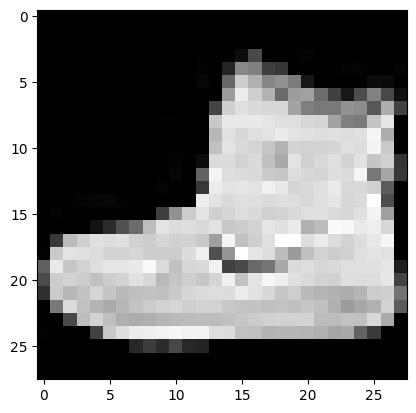

In [32]:
plt.imshow(train_images[0],cmap= "gray")#Ankle boot

In [33]:
train_images = train_images.reshape((60000,28*28)) 
test_images = test_images.reshape((10000, 28*28))

In [34]:
train_images = train_images.astype("float32")/255 # normalizing the data [0,1] 
test_images = test_images.astype("float32")/255

In [35]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),  # 512 neurons are relu activation function
    layers.Dense(10, activation="softmax")  #10 neuron are softmax activation function
])

In [36]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.5541 - accuracy: 0.8019
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3870 - accuracy: 0.8584
Epoch 3/5
469/469 [==============================] - 9s 18ms/step - loss: 0.3403 - accuracy: 0.8741
Epoch 4/5
469/469 [==============================] - 9s 18ms/step - loss: 0.3133 - accuracy: 0.8846
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.2948 - accuracy: 0.8903


In [38]:
prediction = model.predict(test_images[0:1]) #convert 2D array os shape
prediction

1/1 [==============================] - 0s 114ms/step


array([[7.1837053e-06, 5.3662114e-07, 4.6585142e-06, 5.3491176e-06,
        1.9227903e-06, 1.9670079e-02, 7.2364514e-06, 4.4290483e-02,
        1.8837632e-04, 9.3582416e-01]], dtype=float32)

In [39]:
prediction.argmax() #its most probabily estimated to be class no.9 

9

In [40]:
test_labels[0]  #known label

9

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.3679 - accuracy: 0.8726
test_acc: 0.8726000189781189


In [42]:
test_loss, train_acc = model.evaluate(train_images, train_labels)
print(f"train_acc: {train_acc}")

   1/1875 [..............................] - ETA: 1:25 - loss: 0.4037 - accuracy: 0.9062

1875/1875 [==============================] - 11s 6ms/step - loss: 0.2842 - accuracy: 0.8938
train_acc: 0.8937666416168213


In [43]:
predictions = model.predict(test_images)
predictedLabels = np.argmax(predictions, axis=1)
confusionMatrix = confusion_matrix(test_labels, predictedLabels)
confusionMatrix

313/313 [==============================] - 2s 6ms/step


array([[819,   0,  19,  52,   1,   2, 104,   0,   3,   0],
       [  2, 965,   1,  27,   3,   0,   2,   0,   0,   0],
       [ 10,   0, 893,  12,  44,   0,  40,   0,   1,   0],
       [ 11,   3,  19, 933,  10,   0,  21,   0,   3,   0],
       [  1,   0, 225,  58, 666,   0,  50,   0,   0,   0],
       [  0,   0,   0,   1,   0, 944,   0,  35,   2,  18],
       [113,   1, 145,  45,  63,   0, 624,   0,   9,   0],
       [  0,   0,   0,   0,   0,   7,   0, 968,   0,  25],
       [  5,   0,  11,   6,   3,   1,   4,   5, 965,   0],
       [  0,   0,   0,   1,   0,   5,   1,  44,   0, 949]], dtype=int64)


From the Confusion Matrix, we can gain various insights into the model's performance across different classes. The matrix distinguishes between correctly classified instances, represented by the diagonal elements, and misclassifications, which occur in the off-diagonal elements.

Classes with prominent diagonal values, such as T-shirt, Trouser, Sandal, and Bag, indicate that the model excelled in accurately distinguishing these categories.

Conversely, classes with off-diagonal values, like T-shirt and Shirt being misclassified, along with Coat and Shirt being mistakenly labeled as Pullover, and instances where Sneakers were misclassified as Ankle Boot or Sandal, reveal areas where the model struggled with accurate classification.